
# Regression exercise with house prices
This is my second competition to attend to do practice with the techniques that I learned from books and classes on a real problem. Here I try just to practice data visualization, cleaning (mostly fill na) and training simple regression models. I learned a lot by looking at the kernel provided by Serigne ( https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard ).

In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Matlab-style plotting
# import seaborn as sns

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "."]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Amses_house_prices_cleaned.csv
albalu_solution.ipynb
albalu_submission.csv
albalu_submission_gb.csv
data_description.txt
sample_submission.csv
test.csv
train.csv



In [22]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
test_id = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

> ## Data Preparation

In [23]:
train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [24]:
test.head(2) # test is missing 'SalePrice' that we want to predict

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [25]:
train.shape

(1460, 80)

In [26]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
ntrain = train.shape[0]

In [39]:
test.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

In [40]:
y_train = train['SalePrice'].values
# train.drop(['SalePrice'], axis=1, inplace=True)
# all_data = pd.concat((train, test)).reset_index(drop=True)
all_data = train

> ## Data Visualization

NameError: name 'sns' is not defined

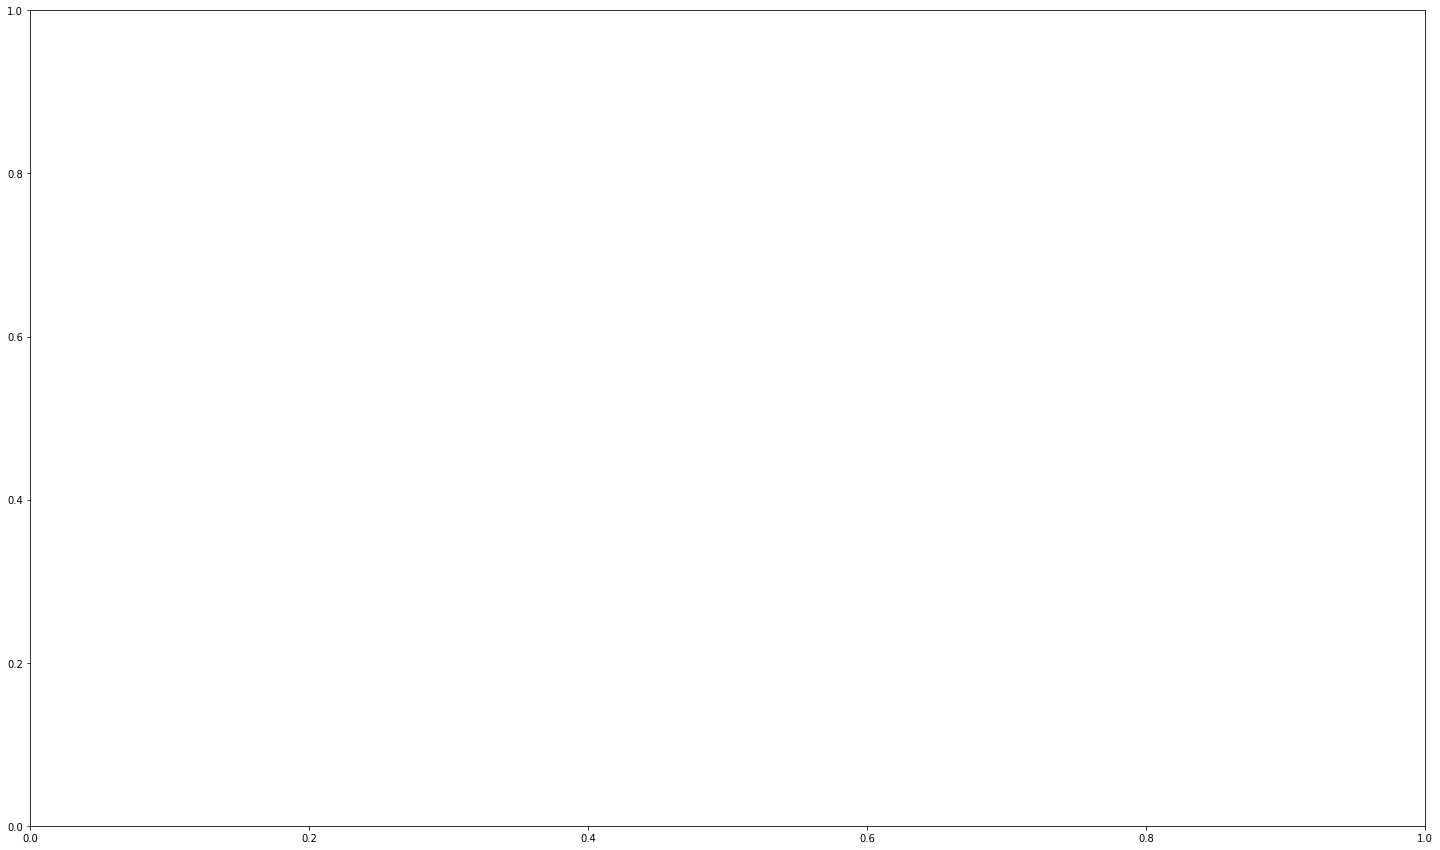

In [41]:
corrmat = all_data.corr()
plt.subplots(figsize=(25,15))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

## Data Cleaning

In [42]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]

In [43]:
all_data_na

PoolQC          99.588477
MiscFeature     96.296296
Alley           93.758573
Fence           80.727023
FireplaceQu     47.325103
LotFrontage     17.764060
GarageYrBlt      5.555556
GarageType       5.555556
GarageFinish     5.555556
GarageQual       5.555556
GarageCond       5.555556
BsmtFinType2     2.606310
BsmtExposure     2.606310
BsmtFinType1     2.537723
BsmtCond         2.537723
BsmtQual         2.537723
MasVnrArea       0.548697
MasVnrType       0.548697
Electrical       0.068587
dtype: float64

In [44]:
NaN_means_0_list = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
all_data[NaN_means_0_list] = all_data[NaN_means_0_list].fillna(0.0)

In [45]:
all_data["LotFrontage"] = all_data.groupby('Neighborhood')["LotFrontage"].transform(
    lambda x:x.fillna(x.median())) # we use median as the mode would still be NaN

In [46]:
NaN_means_0_list_2 = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                     'GarageYrBlt', 'GarageArea', 'GarageCars',
                     'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                     'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                     'MasVnrType', 'MasVnrArea', 'MSSubClass']
all_data[NaN_means_0_list_2] = all_data[NaN_means_0_list_2].fillna(0.0)

In [47]:
fill_with_mode = ['MSZoning', 'Functional', 'Electrical', 'KitchenQual', 
                  'Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities']
for feat in fill_with_mode:
    all_data[feat] = all_data[feat].fillna(all_data[feat].mode()[0])

In [48]:
all_data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500


### Feature engineering (str to float)

In [49]:
all_data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500


In [50]:
all_data.to_csv("Ames_house_prices_cleaned.csv")

In [18]:
all_data.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

## Feature Creation

In [24]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [25]:
all_data = pd.get_dummies(all_data) # converting str & categorical features to separate 0-1 ones

In [26]:
all_data.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0


## Learning

In [27]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit, cross_val_score, GridSearchCV
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

In [29]:
rf.fit(train, y_train)
results = cross_val_score(rf, train, y_train, cv=cv, scoring='neg_mean_squared_error')
print('average error: {} +- {}'.format(abs(results.mean())**0.5, results.std()**0.5))

average error: 27563.88633595019 +- 11869.154929537304


In [30]:
gb.fit(train, y_train)
results = cross_val_score(gb, train, y_train, cv=cv, scoring='neg_mean_squared_error')
print('average error: {} +- {}'.format(abs(results.mean())**0.5, results.std()**0.5))

average error: 22790.89024388834 +- 8350.182553647825


In [31]:
# param_grid = {'min_samples_leaf': range(1, 5), 
#               'min_samples_split': range(2, 5), 'n_estimators': [10, 20, 50, 100, 200]}
# gcv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')
# rfg = gcv.fit(train, y_train)


In [32]:
# print('best score for grid search: {}'.format(abs(rfg.best_score_)**0.5))
# print('best parameters for grid search: {}'.format(rfg.best_params_))

In [33]:
y_pred = gb.predict(test)

## Submission

In [34]:
submission = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred})
submission.to_csv('albalu_submission_gb.csv', index=False)